In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
# Aim is to predict the marks of students of the test data

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Training data.xlsx to Training data.xlsx


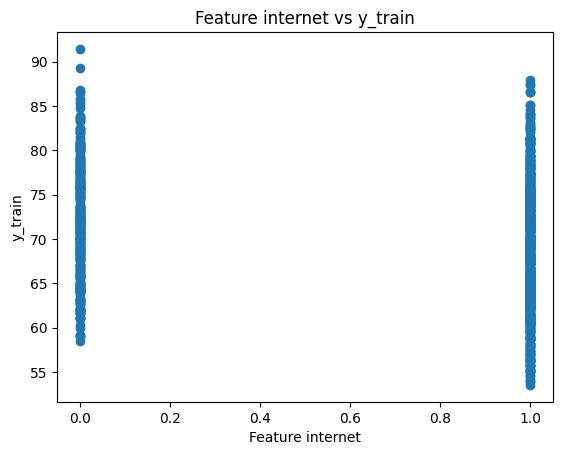

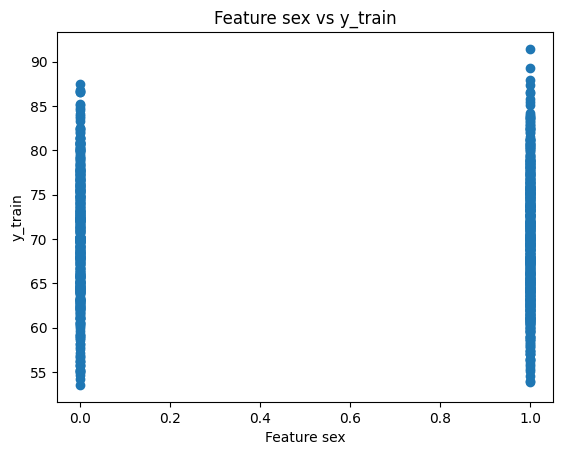

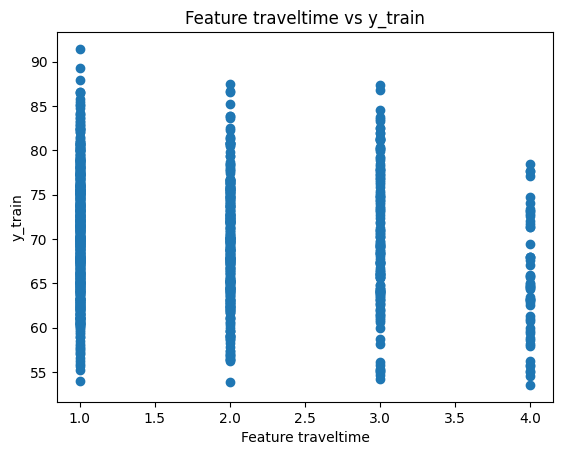

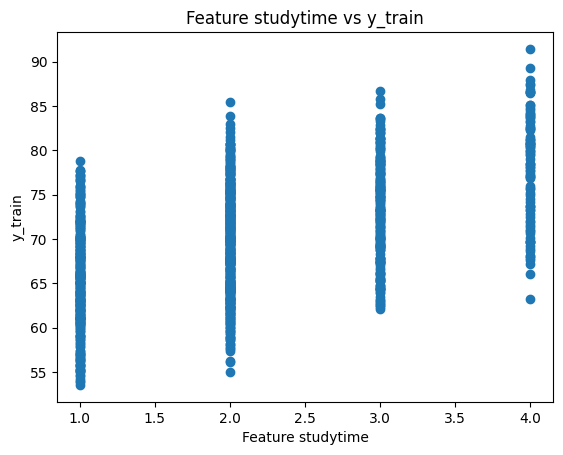

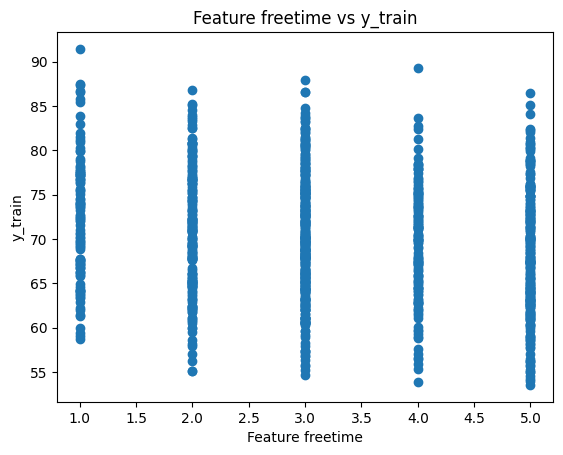

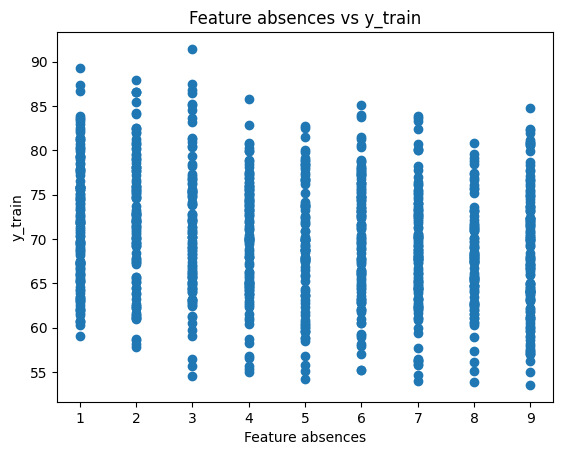

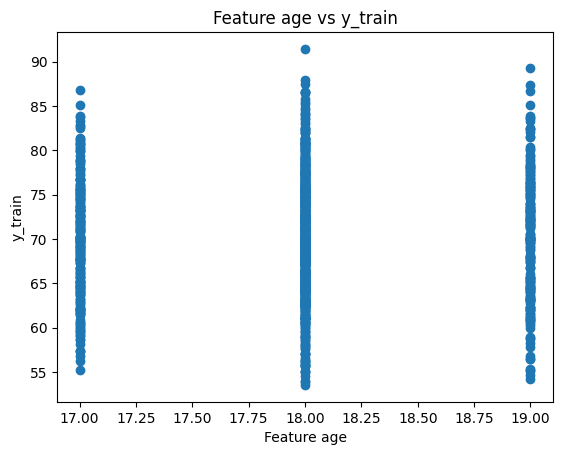

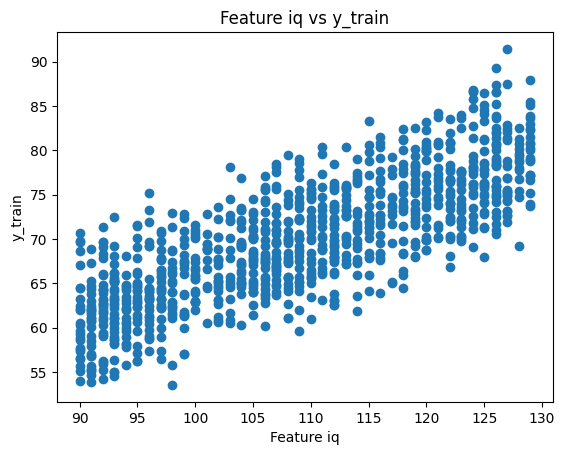

In [ ]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = data.iloc[:, 0:8]
y_train = data.iloc[:, 8].values.reshape(-1, 1)


labelencoder_internet = LabelEncoder()
x_train['internet'] = labelencoder_internet.fit_transform(x_train['internet'])

labelencoder_sex = LabelEncoder()
x_train['sex'] = labelencoder_sex.fit_transform(x_train['sex'])

# Try plotting y_train with different features
for i in range(x_train.shape[1]):
    plt.figure()
    plt.scatter(x_train.iloc[:, i], y_train)
    plt.title(f'Feature {x_train.columns[i]} vs y_train')
    plt.xlabel(f'Feature {x_train.columns[i]}')
    plt.ylabel('y_train')
    plt.show()

x_train = x_train.values
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    poly = PolynomialFeatures(degree=2, include_bias=False)
    x_train = poly.fit_transform(x_train)
    return x_train

x_train = feature_changing(x_train)

In [ ]:
def z_score(x_train):
    x_mean = np.mean(x_train,axis =0)
    x_std = np.std(x_train,axis=0)
    x_train = (x_train-x_mean)/x_std

    return x_train,x_std,x_mean

x_train, x_std, x_mean = z_score(x_train)

In [ ]:
def cost(x_train,y_train,w,b):
    m = x_train.shape[0]
    predict = np.dot(x_train,w)+b
    errors = predict - y_train
    loss = (1/2*m) * np.sum(errors**2)

    return loss

In [ ]:
def gradient_descent(x_train,y_train,w,b):
 m = x_train.shape[0]

 for i in range(1000000):
    predict = np.dot(x_train,w)+b
    errors = predict - y_train
    dw = (1 / m)*np.dot(x_train.T, errors)
    db = (1 / m)*np.sum(errors)
    w -= 0.001 * dw
    b -= 0.001 * db

    return w,b

In [ ]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,0:8]
labelencoder_internet = LabelEncoder()
x_predict['internet'] = labelencoder_internet.fit_transform(x_predict['internet'])

labelencoder_sex = LabelEncoder()
x_predict['sex'] = labelencoder_sex.fit_transform(x_predict['sex'])
x_predict = x_predict.values
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")